<a href="https://colab.research.google.com/github/Dug0/Dug0/blob/main/eda_assignment_dugo_gadisa.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Assignment on EDA**

#**Assignment 1: Feature Importance and Multicollinearity**

#**Feature Importance**

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor
from sklearn.inspection import permutation_importance
from sklearn.feature_selection import mutual_info_regression
from statsmodels.stats.outliers_influence import variance_inflation_factor


# Sample dataset
data = pd.DataFrame({
    'Age': np.random.randint(18, 60, 1000),
    'Salary': np.random.randint(30000, 120000, 1000),
    'Experience': np.random.randint(1, 30, 1000),
    'Education_Level': np.random.randint(1, 5, 1000),
    'Performance_Score': np.random.rand(1000) * 10
})

# Feature Importance using Permutation Importance
X = data.drop(columns=['Performance_Score'])
y = data['Performance_Score']
model = RandomForestRegressor()
model.fit(X, y)
perm_importance = permutation_importance(model, X, y)
feature_importance = pd.Series(perm_importance.importances_mean, index=X.columns)
print("Permutation Importance:")
print(feature_importance)

# Feature Importance using Mutual Information
mi = mutual_info_regression(X, y)
mi_series = pd.Series(mi, index=X.columns)
print("\nMutual Information:")
print(mi_series)


Permutation Importance:
Age                0.627424
Salary             0.740511
Experience         0.527920
Education_Level    0.269052
dtype: float64

Mutual Information:
Age                0.021083
Salary             0.000000
Experience         0.000000
Education_Level    0.011690
dtype: float64


#**Multicollinearity**

In [ ]:
vif_data = pd.DataFrame()
vif_data["Feature"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
print("\nVariance Inflation Factor (VIF):")
print(vif_data)


Variance Inflation Factor (VIF):
           Feature       VIF
0              Age  6.999792
1           Salary  6.513405
2       Experience  3.623249
3  Education_Level  4.847321


#**Covariance**

In [ ]:
cov_matrix = X.cov()
print("\nCovariance Matrix:")
print(cov_matrix)


Covariance Matrix:
                         Age        Salary   Experience  Education_Level
Age               149.258297  2.597123e+03     2.078212         0.053872
Salary           2597.122995  6.935097e+08  1998.564997       471.148412
Experience          2.078212  1.998565e+03    71.043247        -0.069361
Education_Level     0.053872  4.711484e+02    -0.069361         1.256773


# **Assignment 2: Data Distributions and Visualization**

#**Data Distributions**

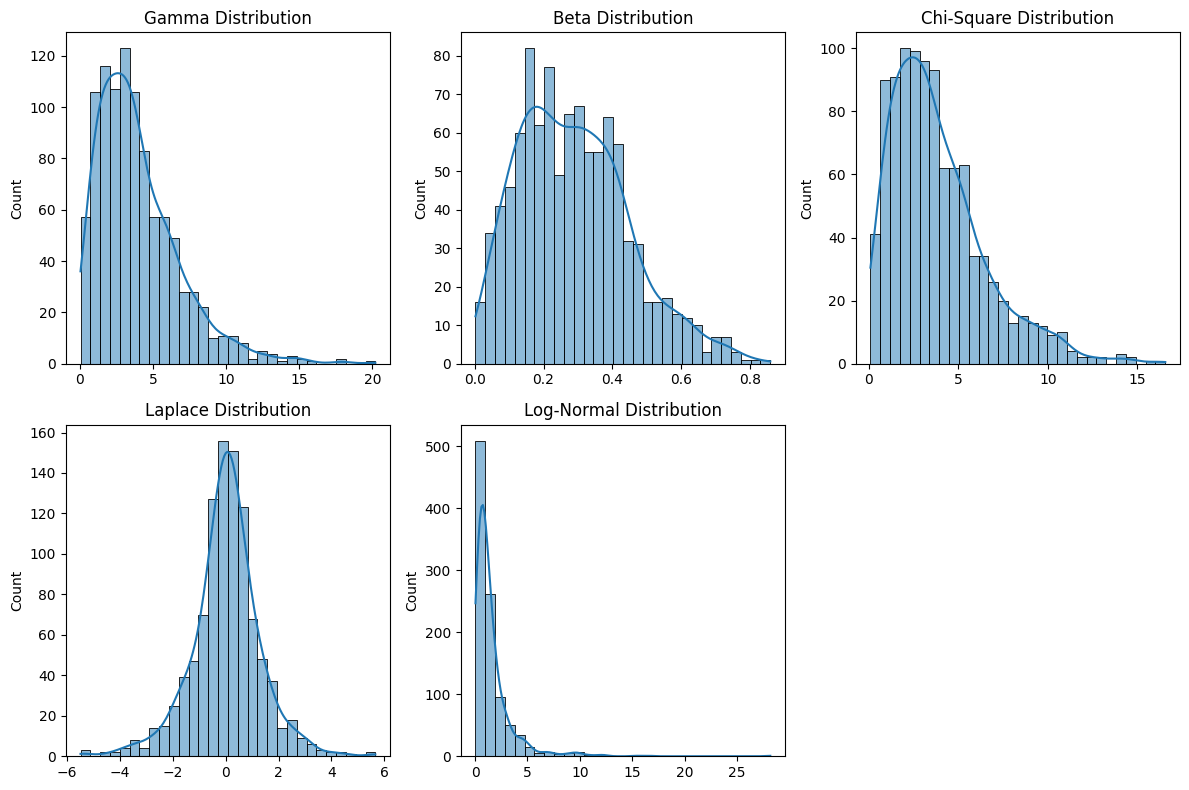

In [ ]:
plt.figure(figsize=(12, 8))

distributions = {
    "Gamma": np.random.gamma(shape=2, scale=2, size=1000),
    "Beta": np.random.beta(a=2, b=5, size=1000),
    "Chi-Square": np.random.chisquare(df=4, size=1000),
    "Laplace": np.random.laplace(loc=0, scale=1, size=1000),
    "Log-Normal": np.random.lognormal(mean=0, sigma=1, size=1000)
}

for i, (name, dist) in enumerate(distributions.items(), 1):
    plt.subplot(2, 3, i)
    sns.histplot(dist, kde=True, bins=30)
    plt.title(f"{name} Distribution")

plt.tight_layout()
plt.show()

#**Data Visualization**

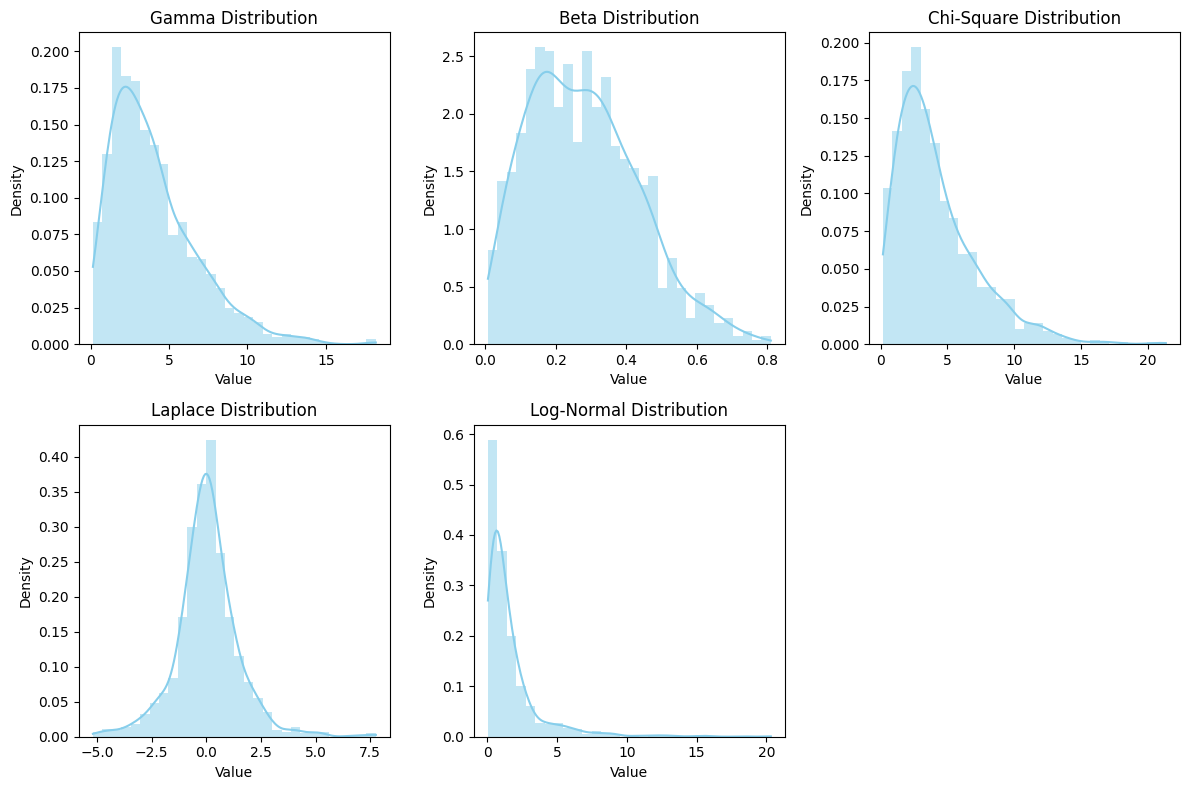

In [ ]:
# synthetic data for different distributions
distributions = {
    "Gamma": np.random.gamma(shape=2, scale=2, size=1000),
    "Beta": np.random.beta(a=2, b=5, size=1000),
    "Chi-Square": np.random.chisquare(df=4, size=1000),
    "Laplace": np.random.laplace(loc=0, scale=1, size=1000),
    "Log-Normal": np.random.lognormal(mean=0, sigma=1, size=1000)
}

plt.figure(figsize=(12, 8))

for i, (name, dist) in enumerate(distributions.items(), 1):
    plt.subplot(2, 3, i)
    sns.histplot(dist, kde=True, bins=30, color="skyblue", stat="density", linewidth=0)
    plt.title(f"{name} Distribution")
    plt.xlabel("Value")
    plt.ylabel("Density")

plt.tight_layout()
plt.show()
